In [1]:
import networkx as nx
from fair_cc_functions import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def greedy_puzzle(red_g, blue_g):
    # 2) perform cc-pivot on each subgraph, clusters sorted
    blue_cluster = sorted(cc_pivot(blue_g), key=len)
    red_cluster = sorted(cc_pivot(red_g), key=len)

    # 3) get size of clustering
    min_c = np.min([len(blue_cluster), len(red_cluster)])
    max_c = np.max([len(blue_cluster), len(red_cluster)])
    if len(red_cluster) > len(blue_cluster):
        big = red_cluster
        small = blue_cluster
    else:
        big = blue_cluster
        small = red_cluster

    # 4) greedy algo and sort the largest clusters together
    final_cluster=[]
    remain_small = []
    remain_big = []
    for i in range(0, min_c):
        if len(big[i]) == len(small[i]):
            final_cluster.append(big[i] + small[i])
            continue
        # cut at smaller cluster
        if len(big[i]) < len(small[i]):
            if remain_big:
                fill = []
                # fill up with remain_big until equal
                while remain_big:
                    el = remain_big[0]
                    fill.extend(el)
                    remain_big.remove(el)
                    if len(fill)+len(big[i]) == len(small[i]):
                        final_cluster.append(big[i]+fill + small[i])
                # if not enough elements in remain_big
                if not remain_big:
                    final_cluster.append(big[i]+fill+small[i][:len(big[i]+fill)])
                    remain_small.append(small[i][len(big[i]+fill):])
            else:
                final_cluster.append(big[i]+small[i][:len(big[i])])
                remain_small.append(small[i][len(big[i]):])
            continue
        if len(big[i]) > len(small[i]):
            if remain_small:
                fill = []
                while remain_small:
                    el = remain_small[0]
                    fill.extend(el)
                    remain_small.remove(el)
                    if len(fill) + len(small[i]) == len(big[i]):
                        final_cluster.append(big[i]+fill +small[i])
                if not remain_small:
                    final_cluster.append(big[:len(small[i]+fill)]+fill+small[i])
                    remain_big.append(big[i][len(small[i]+fill):])
            else:
                final_cluster.append(big[i][:len(small[i])]+small[i])
                remain_big.append(big[i][len(small[i]):])
            continue
    # sort into remaining clusters
    for i in range(min_c, max_c):
        fill = []
        while remain_small:
            el = remain_small[0]
            fill.extend(el)
            remain_small.remove(el)
            if len(fill) == len(big[i]):
                final_cluster.append(big[i]+fill)
                break
    return final_cluster, red_cluster, blue_cluster

In [3]:
def stats_puzzle(n, red_type, blue_type, iters=10):
    # 1) generate 2 subgraphs (one red, one blue)
    cluster_bal = []
    red_cost, blue_cost = [], []
    cluster_cost = []
    for i in range(10, n, 2):
        _, red_g, blue_g = generate_red_blue_graph(i, red_type, blue_type)
        red_g.add_edges_from(red_g.edges, weight=1)
        red_g.add_edges_from(nx.complement(red_g).edges, weight=0)
        blue_g.add_edges_from(blue_g.edges, weight=1)
        blue_g.add_edges_from(nx.complement(blue_g).edges, weight=0)
        composed_graph = nx.compose(red_g, blue_g)
        c, cost_b, cost_r = [], [], []
        for j in range(iters):
            fin_c, r_cl, b_cl = greedy_puzzle(red_g, blue_g)
            c.append(cost(fin_c, composed_graph))
            cost_b.append(cost(b_cl, blue_g))
            cost_r.append(cost(r_cl, red_g))
        cluster_cost.append(c)
        red_cost.append(cost_r)
        blue_cost.append(cost_b)
    return fin_c, cluster_cost, red_cost, blue_cost

In [4]:
it = 100
tree_tree_puzzle = stats_puzzle(61, 'bal_bin_tree', 'bal_bin_tree', iters=it)
tree_star_puzzle = stats_puzzle(61, 'bal_bin_tree', 'star', it)
tree_cyc_puzzle = stats_puzzle(61, 'bal_bin_tree', 'circle', it)
tree_bipar_puzzle = stats_puzzle(61, 'bal_bin_tree', 'bipartite', it)
tree_3par_puzzle = stats_puzzle(61, 'bal_bin_tree', '3partite', it)

In [5]:
star_star_puzzle = stats_puzzle(61, 'star', 'star', iters=it)
star_cyc_puzzle = stats_puzzle(61, 'star', 'circle', it)
star_3par_puzzle = stats_puzzle(61, 'star', '3partite', it)
star_bipar_puzzle = stats_puzzle(61, 'star', 'bipartite', it)

In [6]:
cyc_cyc_puzzle = stats_puzzle(61, 'circle', 'circle', iters=it)
cyc_bipar_puzzle = stats_puzzle(61, 'circle', 'bipartite', it)
cyc_3par_puzzle = stats_puzzle(61, 'circle', 'bipartite', it)

In [7]:
bipar_bipar_puzzle = stats_puzzle(61, 'bipartite', 'bipartite', it)
bipar_3par_puzzle = stats_puzzle(61, 'bipartite', '3partite', it)
threepar_3par_puzzle = stats_puzzle(61, 'bipartite', '3partite', it)

In [9]:
erd_ren_07 = stats_puzzle(61, 'erdos_renyi', 'erdos_renyi', it)

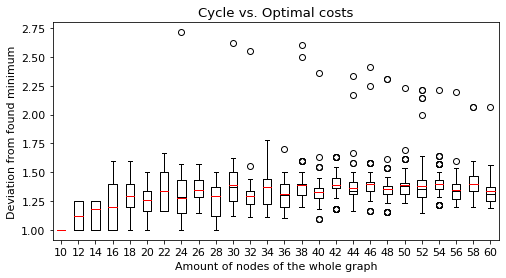

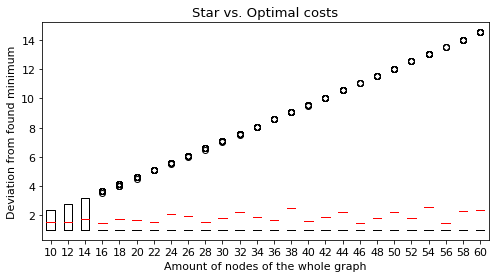

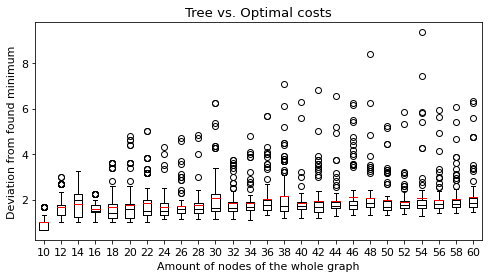

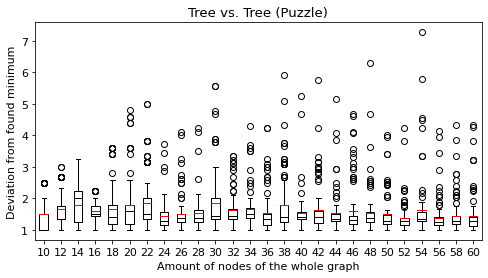

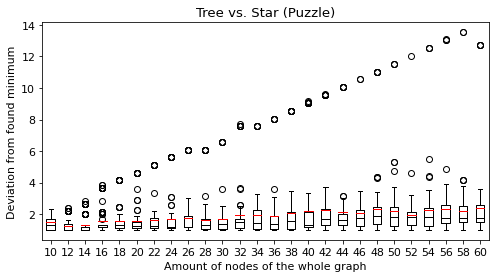

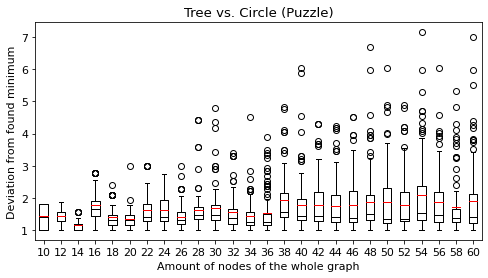

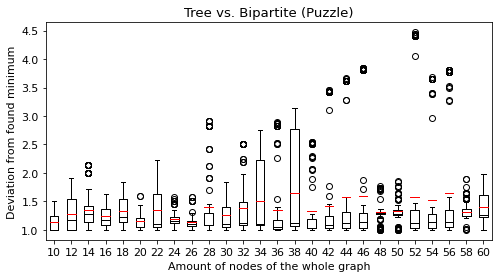

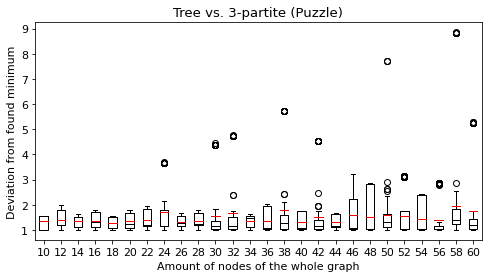

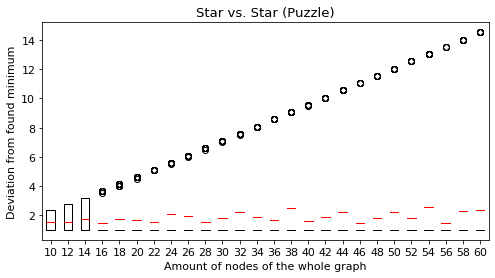

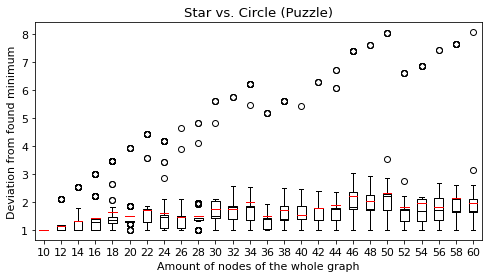

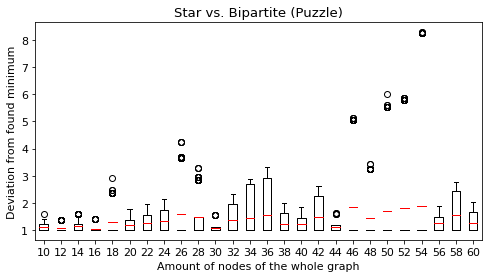

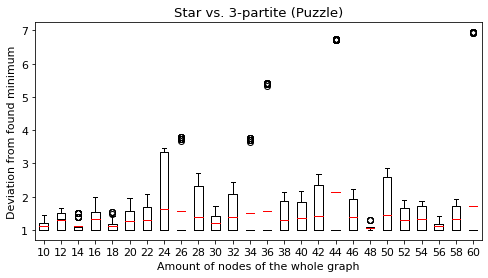

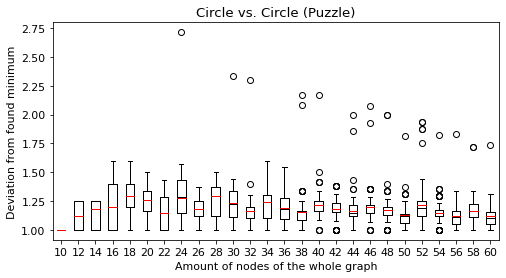

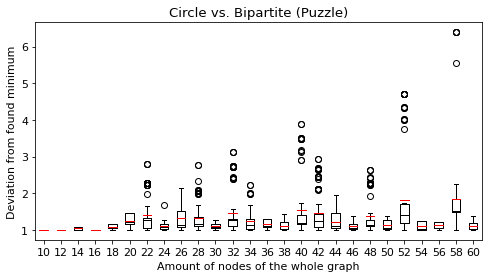

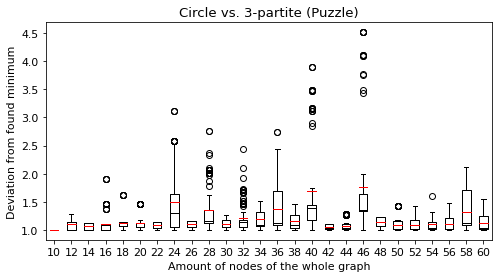

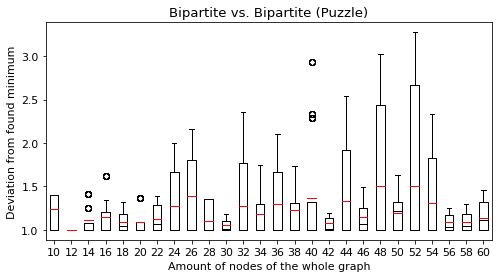

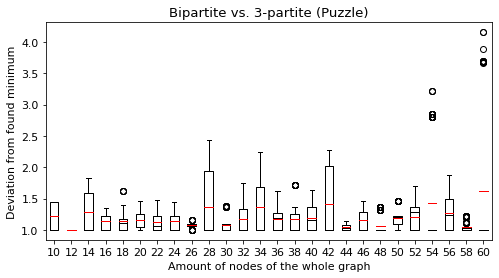

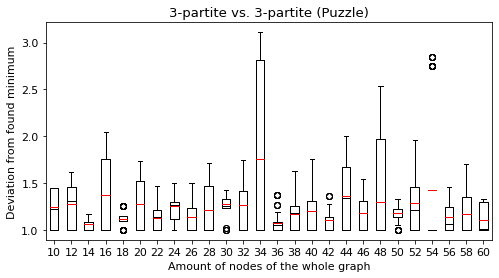

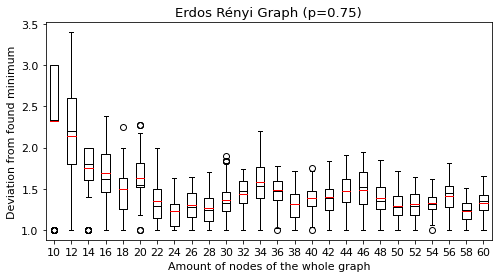

In [13]:
plt.rc('font', size=11)
nodes = [i for i in range(10,61,2)]
def boxplot_vs_opt(to_plot, opt,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):
    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/j for i,j in zip(to_plot, opt)], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

plt.rc('font', size=11)
def draw_boxplot(to_plot,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):

    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/(j) for i,j in zip(to_plot, np.min(to_plot, axis=1))], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

opt_star = [np.float64(i-4) for i in range(10,61,2)]
opt_cyc = [2*(np.floor((j/2)/2)+1) for j in range(10,61,2)]
opt_tree = [2*(np.floor((j/2)/2)+ (j/2) % 2) for j in range (10, 61, 2)]

boxplot_vs_opt(cyc_cyc_puzzle[1], opt_cyc, 'Cycle vs. Optimal costs', name='cyc_puzzle_opt')
boxplot_vs_opt(star_star_puzzle[1], opt_star, 'Star vs. Optimal costs', name='star_puzzle_opt')
boxplot_vs_opt(tree_tree_puzzle[1], opt_tree, 'Tree vs. Optimal costs', name='tree_puzzle_opt')
draw_boxplot(tree_tree_puzzle[1], 'Tree vs. Tree (Puzzle)', name='tree_tree_puzzle')
draw_boxplot(tree_star_puzzle[1], 'Tree vs. Star (Puzzle)', name='tree_star_puzzle')
draw_boxplot(tree_cyc_puzzle[1], 'Tree vs. Circle (Puzzle)',name='tree_cyc_puzzle')
draw_boxplot(tree_bipar_puzzle[1], 'Tree vs. Bipartite (Puzzle)', name='tree_bipar_puzzle')
draw_boxplot(tree_3par_puzzle[1], 'Tree vs. 3-partite (Puzzle)', name='tree_3par_puzzle')
draw_boxplot(star_star_puzzle[1], 'Star vs. Star (Puzzle)', name='star_star_puzzle')
draw_boxplot(star_cyc_puzzle[1], 'Star vs. Circle (Puzzle)', name='star_cyc_puzzle')
draw_boxplot(star_bipar_puzzle[1], 'Star vs. Bipartite (Puzzle)', name='star_bipar_puzzle')
draw_boxplot(star_3par_puzzle[1], 'Star vs. 3-partite (Puzzle)', name='star_3par_puzzle')
draw_boxplot(cyc_cyc_puzzle[1], 'Circle vs. Circle (Puzzle)', name='cyc_cyc_puzzle')
draw_boxplot(cyc_bipar_puzzle[1], 'Circle vs. Bipartite (Puzzle)', name='cyc_bipar_puzzle')
draw_boxplot(cyc_3par_puzzle[1], 'Circle vs. 3-partite (Puzzle)', name='cyc_3par_puzzle')
draw_boxplot(bipar_bipar_puzzle[1], 'Bipartite vs. Bipartite (Puzzle)', name='bipar_bipar_puzzle')
draw_boxplot(bipar_3par_puzzle[1], 'Bipartite vs. 3-partite (Puzzle)', name='bipar_3par_puzzle')
draw_boxplot(threepar_3par_puzzle[1], '3-partite vs. 3-partite (Puzzle)', name='threepar_3par_puzzle')
draw_boxplot(erd_ren_07[1], 'Erdos Rényi Graph (p=0.75)', name='erd_ren_07_puzzle')

In [11]:
data = [cyc_cyc_puzzle[1], star_star_puzzle[1], tree_star_puzzle[1], star_cyc_puzzle[1],  tree_tree_puzzle[1], tree_cyc_puzzle[1], bipar_bipar_puzzle[1], bipar_3par_puzzle[1], threepar_3par_puzzle[1],  cyc_bipar_puzzle[1], cyc_3par_puzzle[1], tree_bipar_puzzle[1], tree_3par_puzzle[1], star_bipar_puzzle[1], star_3par_puzzle[1],erd_ren_07[1]]

names = ['tree_tree_puzzle', 'tree_star_puzzle', 'tree_cyc_puzzle', 'tree_bipar_puzzle', 'tree_3par_puzzle', 'star_star_puzzle', 'star_cyc_puzzle', 'star_bipar_puzzle', 'star_3par_puzzle', 'cyc_cyc_puzzle', 'cyc_bipar_puzzle', 'cyc_3par_puzzle', 'bipar_bipar_puzzle', 'bipar_3par_puzzle', 'threepar_3par_puzzle','erd_ren_07']

max=0
max_mean = 0
max_amt = 0


for i in range(len(data)):
    scaled = [i/j for i,j,k in zip(data[i], np.min(data[i], axis=1), 3*np.min(data[i], axis=1))]
    if np.max(scaled) > max: max = np.max(scaled)
    if np.max(np.mean(scaled, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled, axis=1))
    if np.sum(np.max(scaled, axis=1)>3) > max_amt: max_amt = np.sum(np.max(scaled, axis=1)>3)
    means = np.mean(scaled, axis=1)
    print(np.mean(data[i], axis=1))
    print(names[i]+'(max/mean/amt > 1/mean of means):' + str(np.max(scaled)) + '/'+str(np.max(np.mean(scaled, axis=1)))+'/'+str(np.sum(np.max(scaled, axis = 1)>3))+str(np.mean(data[i]))+'/'+str(np.mean(means)))
print(max)
print(max_mean)
print(max_amt)

[ 6.    8.94  9.44 11.98 12.9  15.1  16.06 17.92 18.86 20.72 22.18 23.36
 24.76 26.22 27.74 29.14 30.64 32.68 33.62 35.12 36.04 38.78 39.12 40.46
 41.9  42.72]
tree_tree_puzzle(max/mean/amt > 1/mean of means):2.7142857142857144/1.295/025.476923076923075/1.1831712877649854
[  9.06  12.52  17.26  18.06  24.04  27.    28.36  41.14  43.26  37.38
  46.52  62.94  57.56  53.78  86.06  57.54  72.4   89.66  63.1   81.12
 101.88  86.78 128.26  78.08 124.38 131.8 ]
tree_star_puzzle(max/mean/amt > 1/mean of means):14.535714285714286/2.5652/2460.76692307692308/1.879695169402146
[  9.08  12.78  16.06  18.86  21.72  24.64  28.92  34.18  38.44  42.28
  47.76  54.44  61.88  63.    75.6   84.16  91.48  89.28  90.2  108.46
 106.06  97.78 118.38 125.84 123.82 151.84]
tree_cyc_puzzle(max/mean/amt > 1/mean of means):13.535714285714286/2.3725/2366.80538461538461/1.9003648896121308
[  9.    12.56  17.2   21.58  27.64  28.7   35.66  43.66  42.88  49.76
  57.9   64.58  78.08  80.08  93.5   88.08 108.04 119.94 1

In [12]:
f = open('res_puzzle.txt', 'w')
f.write(str(data))
f.close()